In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [115]:
## Perceptron implementation

class Perceptron(object):
    #constructor
    def __init__(self, lr=0.001, epochs=1):
        
        self.W = None #weights
        self.epochs = epochs #number of training iterations
        self.lr = lr #learning rate
        self.errors = None #classification errors
    
    #initialize the weights and the errors array
    def initialize(self,inputSize):
        
        self.W = np.zeros(inputSize+1)#+1 for bias,initialized with 0s
        self.errors = []#initialized empty
    
    #activation function
    def activation_fn(self, x):

        return 1 if x>=0 else 0
    
    #given a single x(features), predict it classification
    def predict_aux(self, x):
        
        z = self.W[1:].T.dot(x[1:]) + self.W[0]#net input
        a = self.activation_fn(z)#activation function of z
        return a
    
    #given an entry array X, of features, predict the classification values for each of them
    def predict(self,X):
        
        if(self.W is None):
            print("Error! Perceptron not trained")
        else:
            predictions = []
            for i in range(len(X)):
                x = np.insert(X[i], 0, 1)#insert bias as 1
                predictions.append(self.predict_aux(x))#predict x and append it on predictions
            return predictions
             
    #calculate the score of the model
    def score(self,y,model_predictions):
       
        #error if x and model_predictions have different sizes
        if(len(y) != len(model_predictions)):
            print('Error! Different size arrays!')
        else:
            #compares if the i classification is the same of the i target value
            size = len(y) #size of the arrays
            correctClassified = 0 #number of correct classification
            for i in range(size):
                    if(y[i] == model_predictions[i]):#correct classification
                        correctClassified+=1 
            #precision = percentage of correct classifications
            precision = correctClassified/size
            return correctClassified , precision
    
    #return the wieghts values of the last training. 
    def get_weights(self):
        return self.W
     
    #perceptron training
    def fit(self, X, t):
        
        self.initialize(X.shape[1])#initialize weights and errors, X.shape[1] = number of features
        for _ in range(self.epochs):#training iterations
            errorAux = 0 #misclassification errors of the actual iteration
            for i in range(len(X)):#for each entry in X:
                x = np.insert(X[i], 0, 1)#insert 1 for bias
                y = self.predict_aux(x)#prediction given x
                e = t[i] - y#calculate the error for the i entry prediction
                errorAux += int(e != 0.0)#if the rediction is wrong, append it to errorAux(misclassification)
                self.W[1:] = self.W[1:] + self.lr * e * x[1:]#update weights
                self.W[0] = self.W[0] + self.lr * e#update bias
            self.errors.append(errorAux)#append the iteration error 
        

In [116]:
df = pd.read_csv('Iris_2species.csv')

In [117]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [118]:
Species = df['Species']

In [119]:
#iris-setosa = 1 and iris-versicolor = 0
Species = Species.where(Species =="Iris-setosa" ,other = 0)#not iris-setosa = 0
Species = Species.where(Species == 0 ,other = 1)#not 0 = 1

In [120]:
Species

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: Species, Length: 100, dtype: object

In [121]:
df['Species'] = Species

In [122]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,0
96,97,5.7,2.9,4.2,1.3,0
97,98,6.2,2.9,4.3,1.3,0
98,99,5.1,2.5,3.0,1.1,0


In [123]:
#data pre-processing
y = df['Species']#targer 
X = df.drop(['Species'],axis =1,inplace=True)
X = df.drop(['Id'],axis =1)#unnecessary
X = X.to_numpy()
y = y.to_numpy()

In [124]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

In [125]:
ppn = Perceptron(lr = 0.05,epochs=10)#build a perceptron

In [126]:
ppn.fit(X_train,y_train)#train the perceptron

In [127]:
print(ppn.get_weights())

[ 0.05   0.095  0.3   -0.525 -0.19 ]


In [128]:
X_train_predictions = ppn.predict(X_train)
X_test_predictions = ppn.predict(X_test)

In [129]:
ppn.score(X_train_predictions,y_train)#score in train data

(70, 1.0)

In [130]:
ppn.score(X_test_predictions,y_test)#score in test data

(30, 1.0)

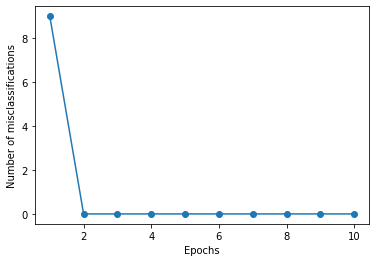

In [131]:
#error-epoch graph
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()
